In [1]:
import json
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

## Comparing PEFT sizes over 20 epochs

In [4]:
with open('../Roberta/results/full_training_run_results_20e.json', 'r') as f:
    results = json.load(f)

#### LoRA

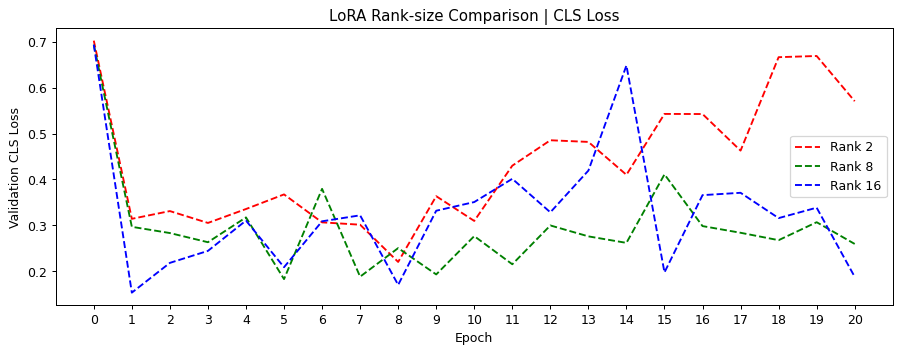

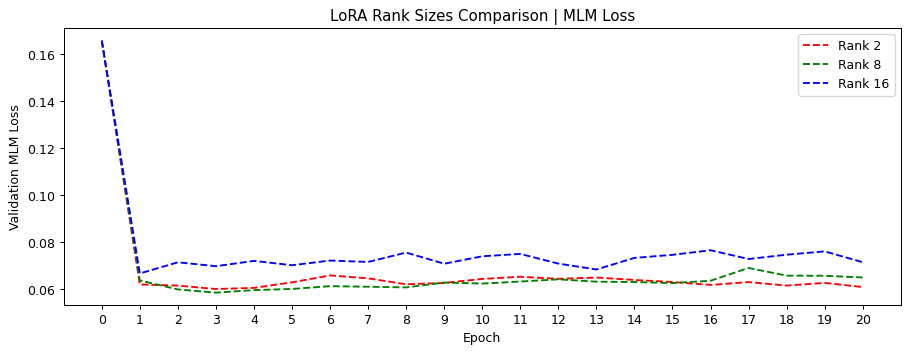

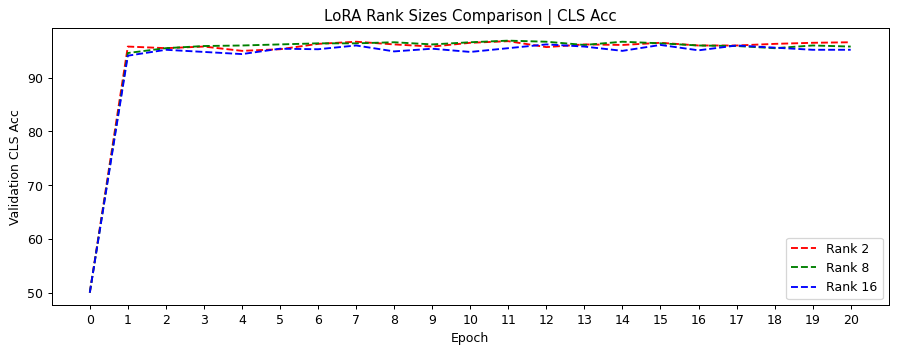

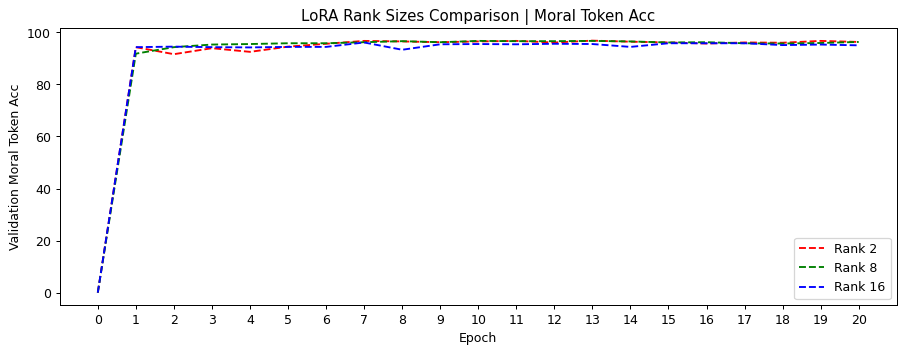

In [ ]:
## Validation CLS Loss
figure(figsize=(12, 4), dpi=90)
plt.xticks(range(0,21))
plt.plot(results['lora_model_rank_2']['val_losses_cls'], label = 'Rank 2', linestyle='dashed', color = 'red')
plt.plot(results['lora_model_rank_8']['val_losses_cls'], label = 'Rank 8', linestyle='dashed', color = 'green')
plt.plot(results['lora_model_rank_16']['val_losses_cls'], label = 'Rank 16', linestyle='dashed', color = 'blue')

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Validation CLS Loss")
plt.title("LoRA Rank Size Comparison | CLS Loss")
plt.show()

## Validation MLM Loss
figure(figsize=(12, 4), dpi=90)

plt.plot(results['lora_model_rank_2']['val_losses_lm'], label = 'Rank 2', linestyle='dashed', color = 'red')
plt.plot(results['lora_model_rank_8']['val_losses_lm'], label = 'Rank 8', linestyle='dashed', color = 'green')
plt.plot(results['lora_model_rank_16']['val_losses_lm'], label = 'Rank 16', linestyle='dashed', color = 'blue')
plt.legend()
plt.xlabel("Epoch")
plt.xticks(range(0,21))
plt.ylabel("Validation MLM Loss")
plt.title("LoRA Rank Size Comparison | MLM Loss")
plt.show()

## Validation CLS Acc
figure(figsize=(12, 4), dpi=90)

plt.plot(results['lora_model_rank_2']['val_cls_accs'], label = 'Rank 2', linestyle='dashed', color = 'red')
plt.plot(results['lora_model_rank_8']['val_cls_accs'], label = 'Rank 8', linestyle='dashed', color = 'green')
plt.plot(results['lora_model_rank_16']['val_cls_accs'], label = 'Rank 16', linestyle='dashed', color = 'blue')
plt.legend()
plt.xlabel("Epoch")
plt.xticks(range(0,21))
plt.ylabel("Validation CLS Acc")
plt.title("LoRA Rank Size Comparison | CLS Acc")
plt.show()

## Validation Moral Token Acc
figure(figsize=(12, 4), dpi=90)

plt.plot(results['lora_model_rank_2']['val_moral_token_accs'], label = 'Rank 2', linestyle='dashed', color = 'red')
plt.plot(results['lora_model_rank_8']['val_moral_token_accs'], label = 'Rank 8', linestyle='dashed', color = 'green')
plt.plot(results['lora_model_rank_16']['val_moral_token_accs'], label = 'Rank 16', linestyle='dashed', color = 'blue')
plt.legend()
plt.xlabel("Epoch")
plt.xticks(range(0,21))
plt.ylabel("Validation Moral Token Acc")
plt.title("LoRA Rank Size Comparison | Moral Token Acc")
plt.show()

### Adapter

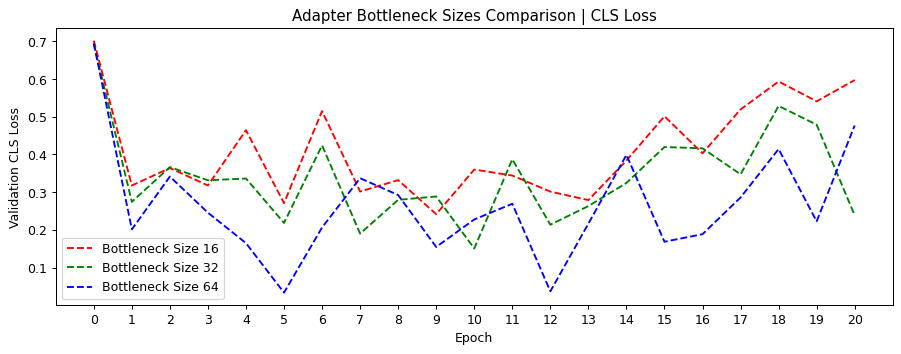

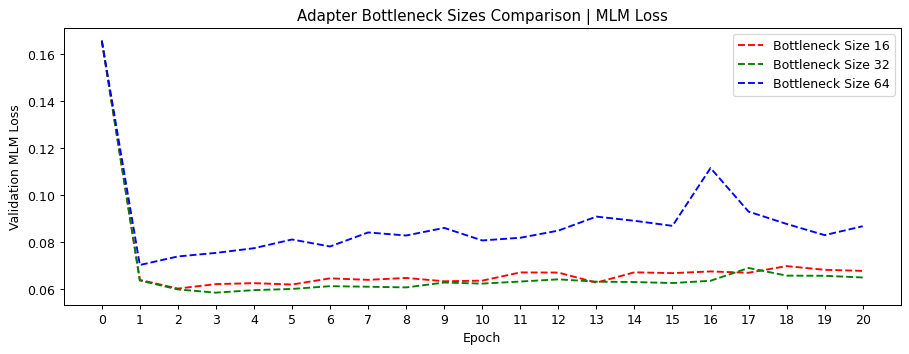

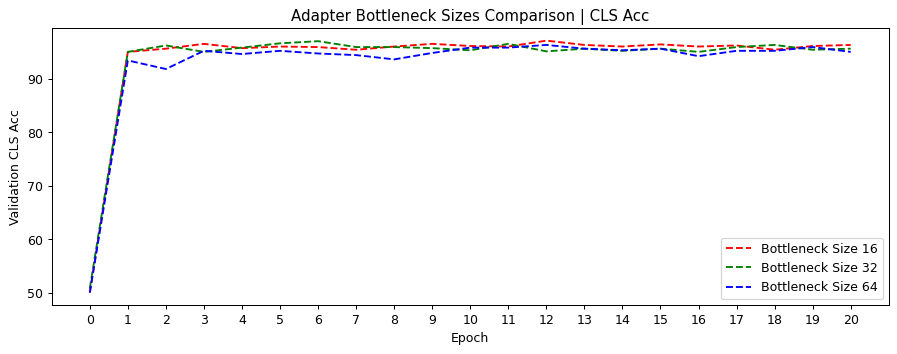

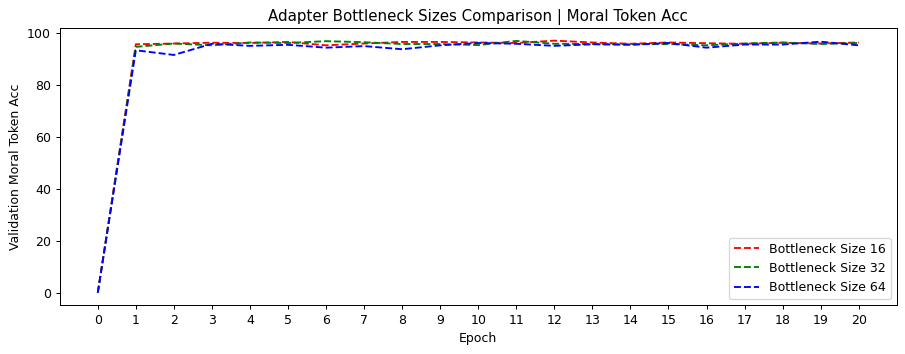

In [9]:
## Validation CLS Loss
figure(figsize=(12, 4), dpi=90)
plt.xticks(range(0,21))
plt.plot(results['adapter_model_16']['val_losses_cls'], label = 'Bottleneck Size 16', linestyle='dashed', color = 'red')
plt.plot(results['adapter_model_32']['val_losses_cls'], label = 'Bottleneck Size 32', linestyle='dashed', color = 'green')
plt.plot(results['adapter_model_64']['val_losses_cls'], label = 'Bottleneck Size 64', linestyle='dashed', color = 'blue')

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Validation CLS Loss")
plt.title("Adapter Bottleneck Sizes Comparison | CLS Loss")
plt.show()

## Validation MLM Loss
figure(figsize=(12, 4), dpi=90)

plt.plot(results['adapter_model_16']['val_losses_lm'], label = 'Bottleneck Size 16', linestyle='dashed', color = 'red')
plt.plot(results['lora_model_rank_8']['val_losses_lm'], label = 'Bottleneck Size 32', linestyle='dashed', color = 'green')
plt.plot(results['adapter_model_64']['val_losses_lm'], label = 'Bottleneck Size 64', linestyle='dashed', color = 'blue')
plt.legend()
plt.xlabel("Epoch")
plt.xticks(range(0,21))
plt.ylabel("Validation MLM Loss")
plt.title("Adapter Bottleneck Sizes Comparison | MLM Loss")
plt.show()

## Validation CLS Acc
figure(figsize=(12, 4), dpi=90)

plt.plot(results['adapter_model_16']['val_cls_accs'], label = 'Bottleneck Size 16', linestyle='dashed', color = 'red')
plt.plot(results['adapter_model_32']['val_cls_accs'], label = 'Bottleneck Size 32', linestyle='dashed', color = 'green')
plt.plot(results['adapter_model_64']['val_cls_accs'], label = 'Bottleneck Size 64', linestyle='dashed', color = 'blue')
plt.legend()
plt.xlabel("Epoch")
plt.xticks(range(0,21))
plt.ylabel("Validation CLS Acc")
plt.title("Adapter Bottleneck Sizes Comparison | CLS Acc")
plt.show()

## Validation Moral Token Acc
figure(figsize=(12, 4), dpi=90)

plt.plot(results['adapter_model_16']['val_moral_token_accs'], label = 'Bottleneck Size 16', linestyle='dashed', color = 'red')
plt.plot(results['adapter_model_32']['val_moral_token_accs'], label = 'Bottleneck Size 32', linestyle='dashed', color = 'green')
plt.plot(results['adapter_model_64']['val_moral_token_accs'], label = 'Bottleneck Size 64', linestyle='dashed', color = 'blue')
plt.legend()
plt.xlabel("Epoch")
plt.xticks(range(0,21))
plt.ylabel("Validation Moral Token Acc")
plt.title("Adapter Bottleneck Sizes Comparison | Moral Token Acc")
plt.show()

### Prefix Size

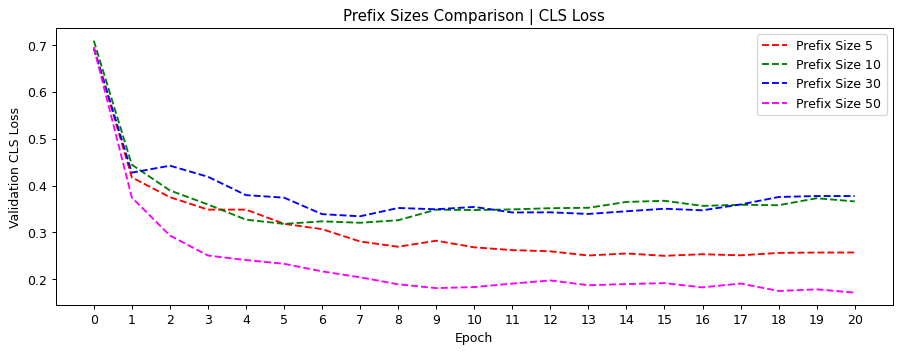

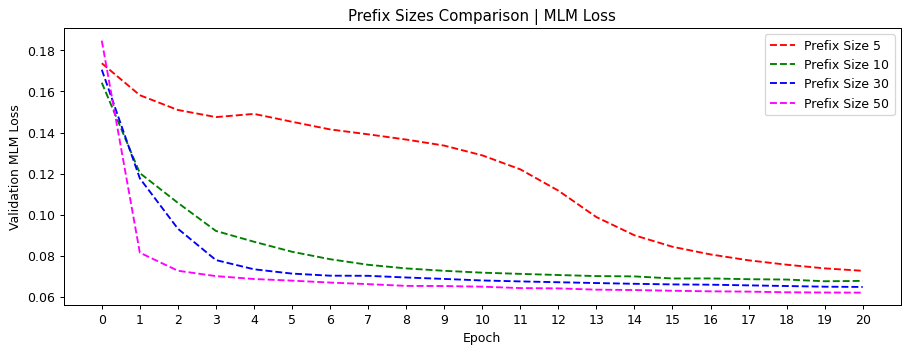

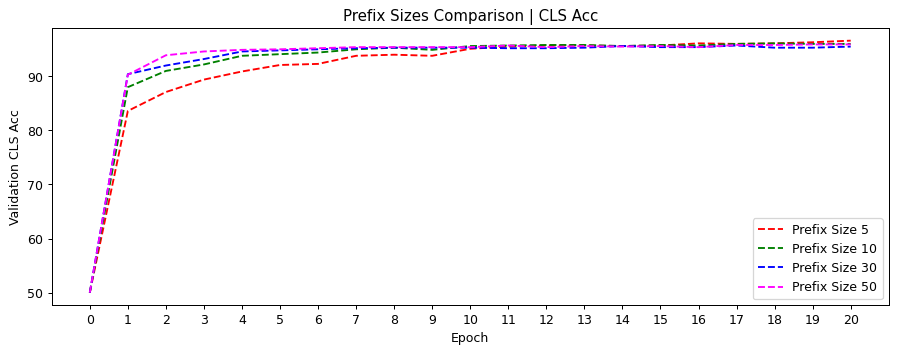

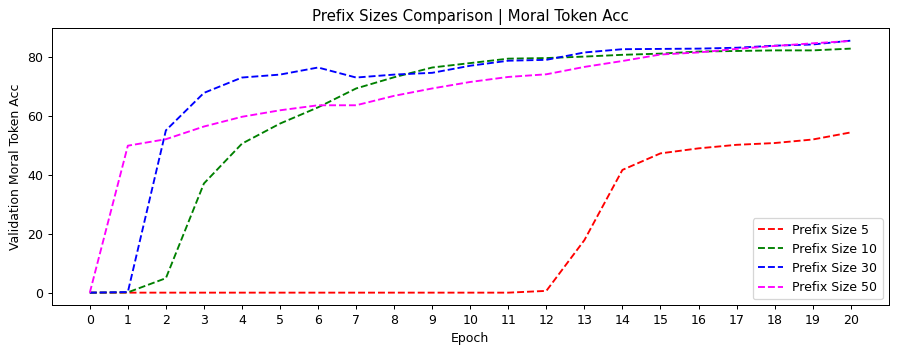

In [10]:
## Validation CLS Loss
figure(figsize=(12, 4), dpi=90)
plt.xticks(range(0,21))
plt.plot(results['prefix_model_5']['val_losses_cls'], label = 'Prefix Size 5', linestyle='dashed', color = 'red')
plt.plot(results['prefix_model_10']['val_losses_cls'], label = 'Prefix Size 10', linestyle='dashed', color = 'green')
plt.plot(results['prefix_model_30']['val_losses_cls'], label = 'Prefix Size 30', linestyle='dashed', color = 'blue')
plt.plot(results['prefix_model_50']['val_losses_cls'], label = 'Prefix Size 50', linestyle='dashed', color = 'magenta')

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Validation CLS Loss")
plt.title("Prefix Sizes Comparison | CLS Loss")
plt.show()

## Validation MLM Loss
figure(figsize=(12, 4), dpi=90)

plt.plot(results['prefix_model_5']['val_losses_lm'], label = 'Prefix Size 5', linestyle='dashed', color = 'red')
plt.plot(results['prefix_model_10']['val_losses_lm'], label = 'Prefix Size 10', linestyle='dashed', color = 'green')
plt.plot(results['prefix_model_30']['val_losses_lm'], label = 'Prefix Size 30', linestyle='dashed', color = 'blue')
plt.plot(results['prefix_model_50']['val_losses_lm'], label = 'Prefix Size 50', linestyle='dashed', color = 'magenta')

plt.legend()
plt.xlabel("Epoch")
plt.xticks(range(0,21))
plt.ylabel("Validation MLM Loss")
plt.title("Prefix Sizes Comparison | MLM Loss")
plt.show()

## Validation CLS Acc
figure(figsize=(12, 4), dpi=90)

plt.plot(results['prefix_model_5']['val_cls_accs'], label = 'Prefix Size 5', linestyle='dashed', color = 'red')
plt.plot(results['prefix_model_10']['val_cls_accs'], label = 'Prefix Size 10', linestyle='dashed', color = 'green')
plt.plot(results['prefix_model_30']['val_cls_accs'], label = 'Prefix Size 30', linestyle='dashed', color = 'blue')
plt.plot(results['prefix_model_50']['val_cls_accs'], label = 'Prefix Size 50', linestyle='dashed', color = 'magenta')

plt.legend()
plt.xlabel("Epoch")
plt.xticks(range(0,21))
plt.ylabel("Validation CLS Acc")
plt.title("Prefix Sizes Comparison | CLS Acc")
plt.show()

## Validation Moral Token Acc
figure(figsize=(12, 4), dpi=90)

plt.plot(results['prefix_model_5']['val_moral_token_accs'], label = 'Prefix Size 5', linestyle='dashed', color = 'red')
plt.plot(results['prefix_model_10']['val_moral_token_accs'], label = 'Prefix Size 10', linestyle='dashed', color = 'green')
plt.plot(results['prefix_model_30']['val_moral_token_accs'], label = 'Prefix Size 30', linestyle='dashed', color = 'blue')
plt.plot(results['prefix_model_50']['val_moral_token_accs'], label = 'Prefix Size 50', linestyle='dashed', color = 'magenta')

plt.legend()
plt.xlabel("Epoch")
plt.xticks(range(0,21))
plt.ylabel("Validation Moral Token Acc")
plt.title("Prefix Sizes Comparison | Moral Token Acc")
plt.show()

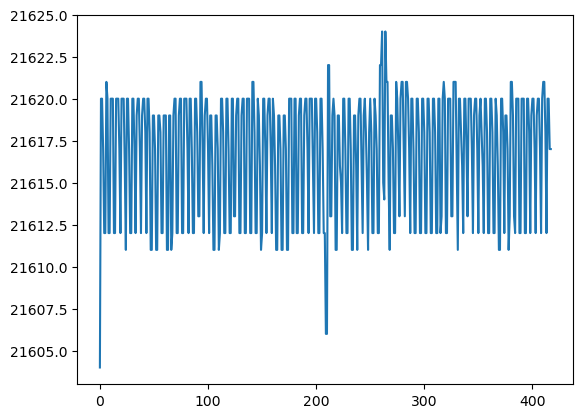

In [17]:
# with open('../Roberta/results/P_training_run_results_2_epoch.json', 'r') as f: 
#     r = json.load(f)

x = r['prefix_model_64']['training_mem_usage']
plt.plot(list(range(418)) , x)
# e = list(range(2))
# for key in r.keys():
#     plt.plot(e, r[key][''], label = key)

# plt.legend()
# plt.show()

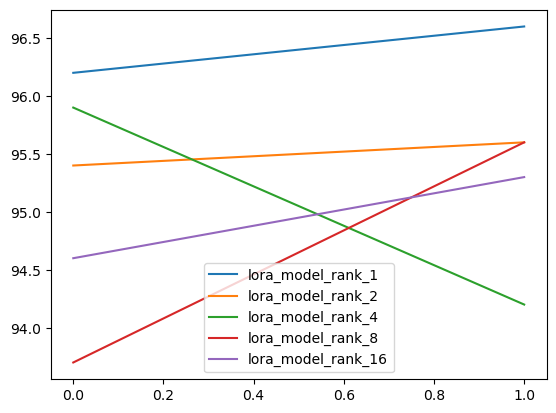

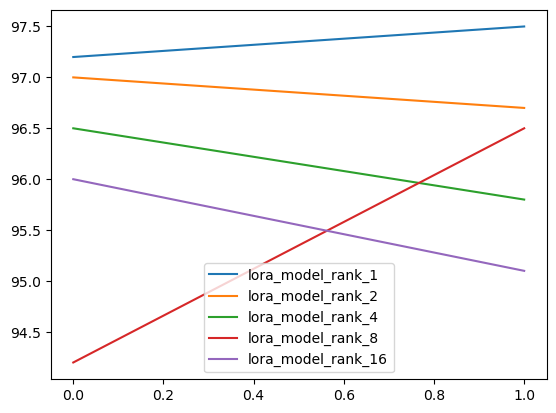

In [ ]:
with open('../Roberta/results/L_A_training_run_results_2_epoch.json', 'r') as f: 
    r = json.load(f)

e = list(range(2))
for key in r.keys():
    if 'lora' in key:
        plt.plot(e, r[key]['val_moral_token_accs'], label = key)

plt.legend()
plt.show()


for key in r.keys():
    if 'lora' in key:
        plt.plot(e, r[key]['val_cls_accs'], label = key)

plt.legend()
plt.show()


# LoRA rank 1, LoRA rank 2 
# Prefix size 64, Prefix size 50
# Adapter 8, 32

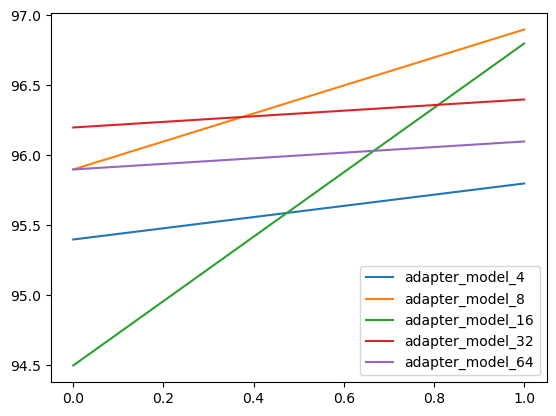

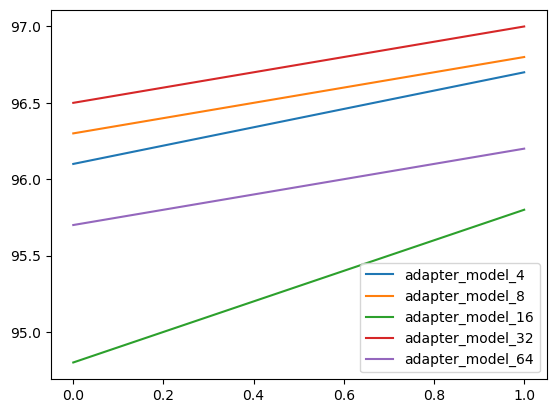

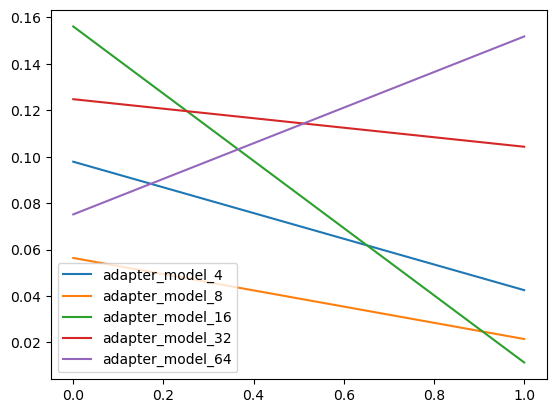

In [11]:
with open('../Roberta/results/L_A_training_run_results_2_epoch.json', 'r') as f: 
    r = json.load(f)

e = list(range(2))
for key in r.keys():
    if 'adapter' in key:
        plt.plot(e, r[key]['val_moral_token_accs'], label = key)

plt.legend()
plt.show()


for key in r.keys():
    if 'adapter' in key:
        plt.plot(e, r[key]['val_cls_accs'], label = key)

plt.legend()
plt.show()

for key in r.keys():
    if 'adapter' in key:
        plt.plot(e, r[key]['val_losses_cls'], label = key)

plt.legend()
plt.show()